In [7]:
# importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
# reading the diwali sales data using pandas
df=pd.read_csv(r'F:\Projects\3. Diwali Sales explorary data analysis\Diwali Sales Data.csv',encoding='unicode_escape')
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [8]:
# getting the number of rows and columns in data
df.shape

(11251, 15)

In [6]:
# getting the daframe information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [10]:
# data cleaning process.. dropping the status and unnamed1 column as their is no records in that column
df.drop(['Status','unnamed1'],axis=1,inplace=True)

In [12]:
df.shape

(11251, 13)

In [11]:
# checking for null values..data cleaning process
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [13]:
# dropping records having null values
df.dropna(inplace=True)

In [14]:
# to check whether records are dropped or not
df.shape

(11239, 13)

In [15]:
# chnaging the datatype of amount column
df['Amount']=df['Amount'].astype('int')
df['Amount'].dtypes

dtype('int64')

In [16]:
# getting the description of the data
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [17]:
# getting the description for the age, orders and Amount
df[['Age','Orders','Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


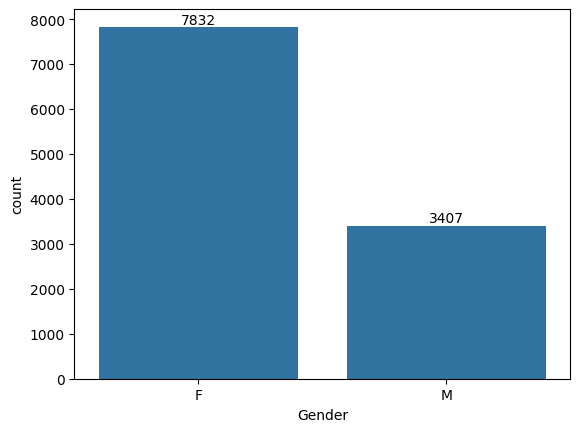

In [22]:
# getting the gender wise distribution of the diwali sales data
ax=sns.countplot(x='Gender', data=df)
for bar in ax.containers:
    ax.bar_label(bar)


In [31]:
# purchasing power by Gender
sales_gen=df.groupby(['Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sales_gen

,Gender,Amount
0,F,74335853
1,M,31913276


In [34]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

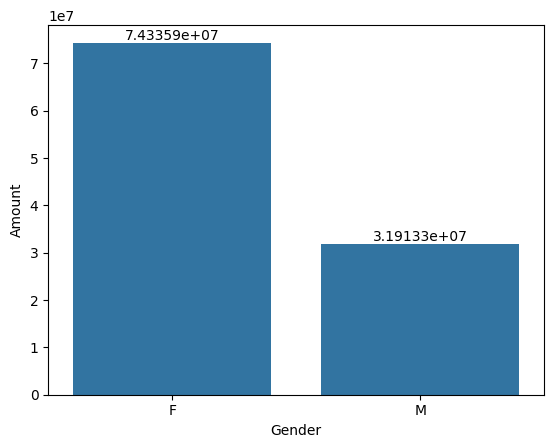

In [32]:
sg=sns.barplot(x='Gender',y='Amount', data=sales_gen)
for bar in sg.containers:
    sg.bar_label(bar)

In [33]:
# frome the above we can see that most of the buyers are females and females have more purchasing power than men

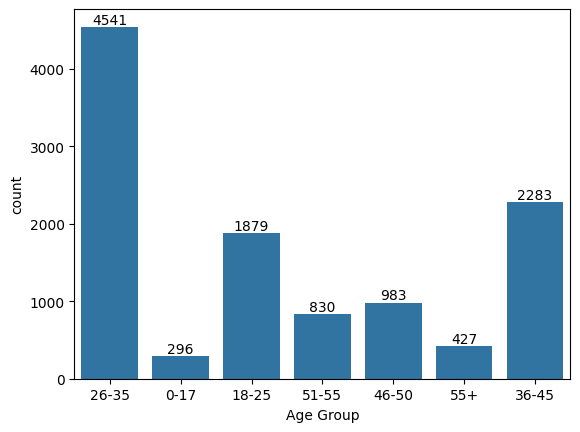

In [35]:
# getting the agewise distribution of diwali data
ag=sns.countplot(data=df,x='Age Group')
for bar in ag.containers:
    ag.bar_label(bar)

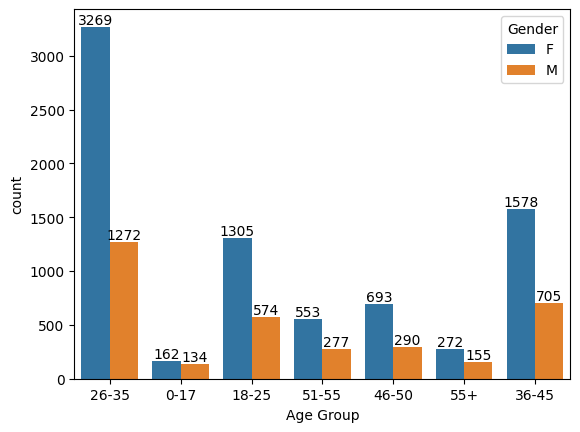

In [36]:
# getting the age and gender wise distribution of the diwali data
ag=sns.countplot(data=df,x='Age Group',hue='Gender')
for bar in ag.containers:
    ag.bar_label(bar)

In [37]:
sales_age=df.groupby(['Age Group'],as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sales_age

,Age Group,Amount
2,26-35,42613442
3,36-45,22144994
1,18-25,17240732
4,46-50,9207844
5,51-55,8261477
6,55+,4080987
0,0-17,2699653


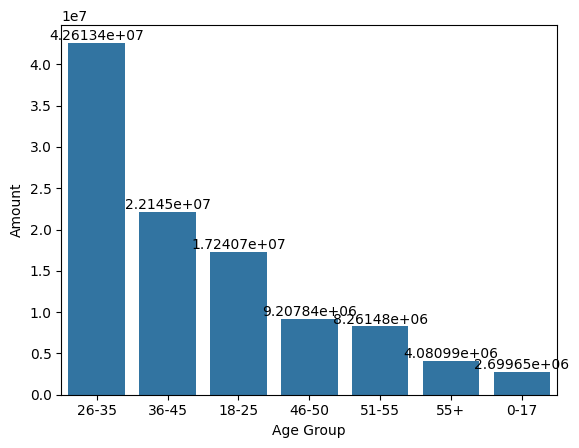

In [40]:
# purchasing power by age
age_x=sns.barplot(x='Age Group',y='Amount',data=sales_age)
for bar in age_x.containers:
    age_x.bar_label(bar)

In [41]:
# from the above graphs we can see that most of the buyers are from 26-35 years Female

In [43]:
# top 10 highest ordered states
sales_state=df.groupby(['State'],as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)
sales_state

,State,Orders
14,Uttar Pradesh,4807
10,Maharashtra,3810
7,Karnataka,3240
2,Delhi,2740
9,Madhya Pradesh,2252
0,Andhra Pradesh,2051
5,Himachal Pradesh,1568
8,Kerala,1137
4,Haryana,1109
3,Gujarat,1066


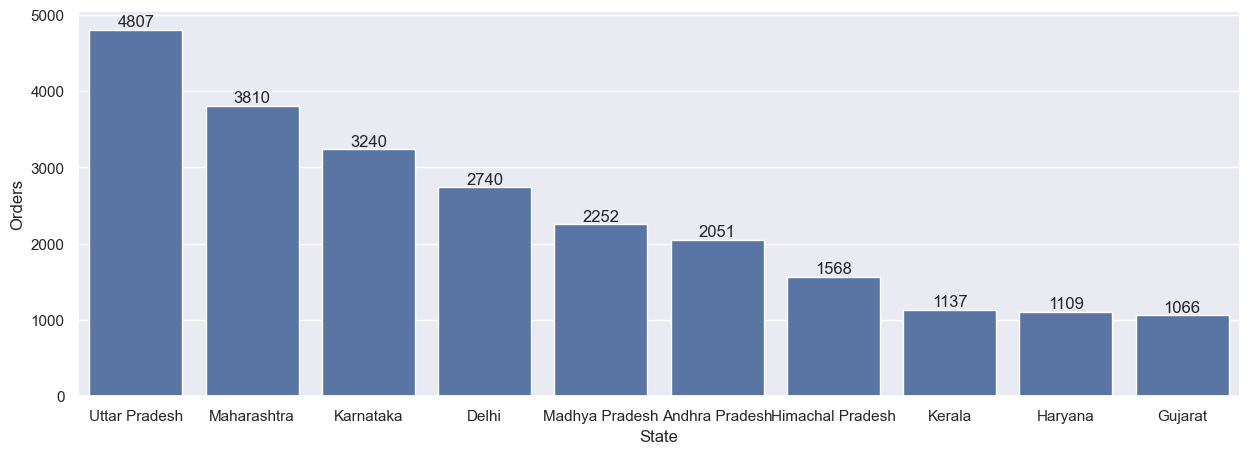

In [48]:
# state wise orders count
state_x=sns.barplot(x='State', y='Orders', data=sales_state)
sns.set(rc={'figure.figsize':(20,5)})
for bar in state_x.containers:
    state_x.bar_label(bar)

In [49]:
# top 10 highest purchasing power in terms of amount by states
sales_state=df.groupby(['State'],as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)
sales_state

,State,Amount
14,Uttar Pradesh,19374968
10,Maharashtra,14427543
7,Karnataka,13523540
2,Delhi,11603818
9,Madhya Pradesh,8101142
0,Andhra Pradesh,8037146
5,Himachal Pradesh,4963368
4,Haryana,4220175
1,Bihar,4022757
3,Gujarat,3946082


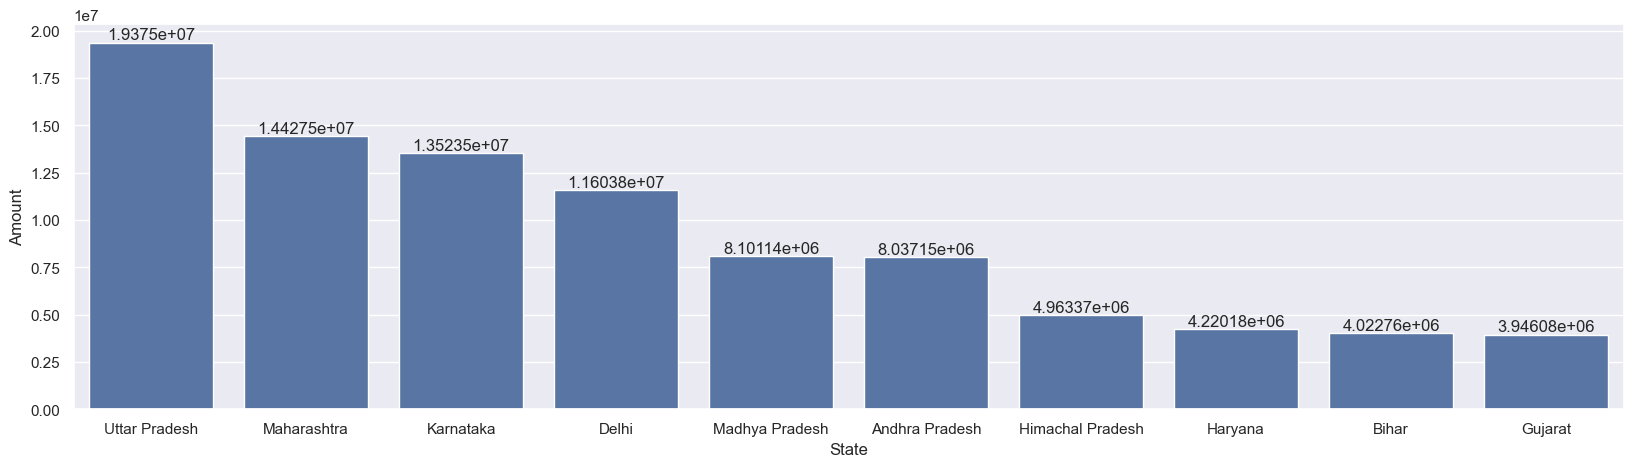

In [50]:
# visualization of the above
state_x=sns.barplot(x='State', y='Amount', data=sales_state)
sns.set(rc={'figure.figsize':(20,5)})
for bar in state_x.containers:
    state_x.bar_label(bar)

In [51]:
# most of the orders are from Uttarpradesh, Maharashtra and Karnataka

In [52]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

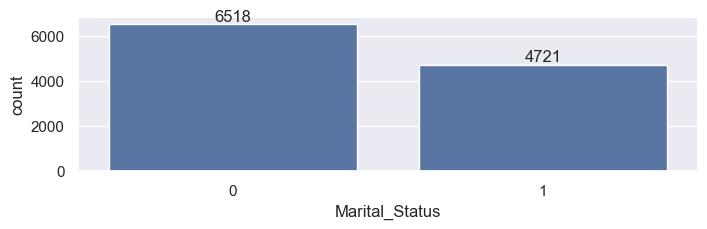

In [63]:
# distribution of married and unmarried peoples
msg=sns.countplot(x='Marital_Status',data=df)
sns.set(rc={'figure.figsize':(3,2)})
for bar in msg.containers:
    msg.bar_label(bar)

In [54]:
# top 10 highest purchasing power in terms of amount by states
sales_ms_g=df.groupby(['Marital_Status','Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sales_ms_g

,Marital_Status,Gender,Amount
0,0,F,43786646
2,1,F,30549207
1,0,M,18338738
3,1,M,13574538


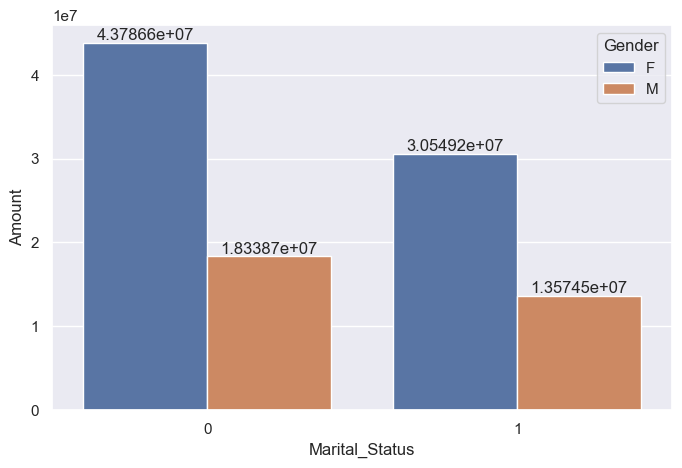

In [56]:
# purchasing power distribution by Marital status
ms_g=sns.barplot(x='Marital_Status',y='Amount',data=sales_ms_g, hue='Gender')
sns.set(rc={'figure.figsize':(8,5)})
for bar in ms_g.containers:
    ms_g.bar_label(bar)

In [64]:
# from the above we can see that Married women have more purchasing power

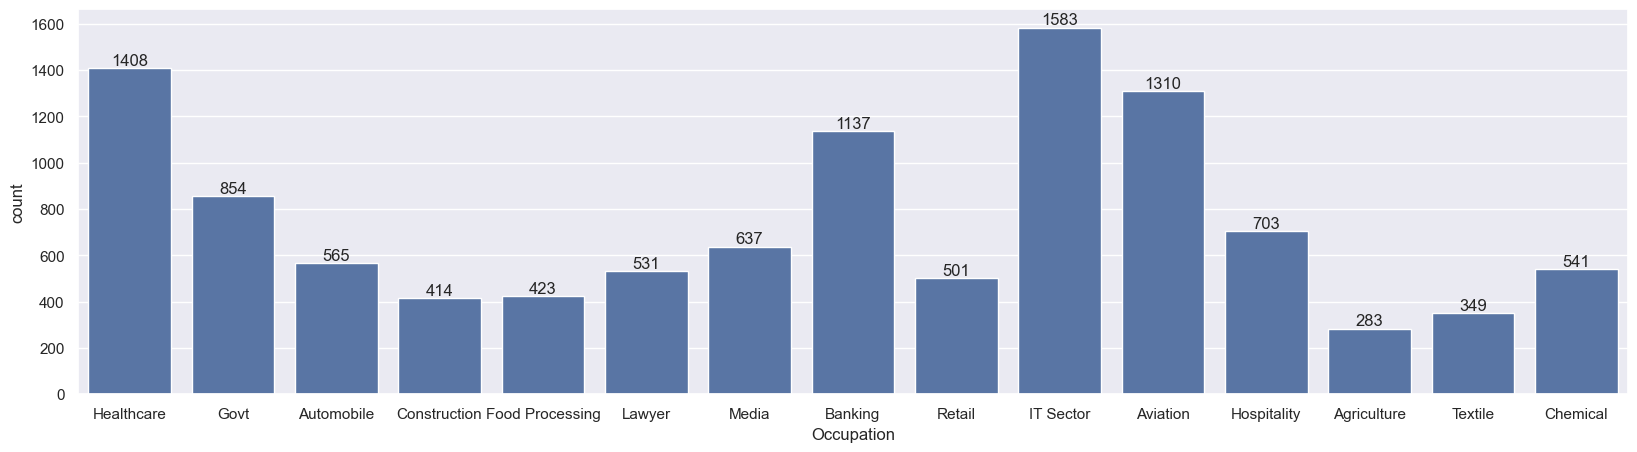

In [66]:
# distribution of Diwali sales by occupation
ax=sns.countplot(x='Occupation',data=df)
sns.set(rc={'figure.figsize':(20,10)})
for bar in ax.containers:
    ax.bar_label(bar)

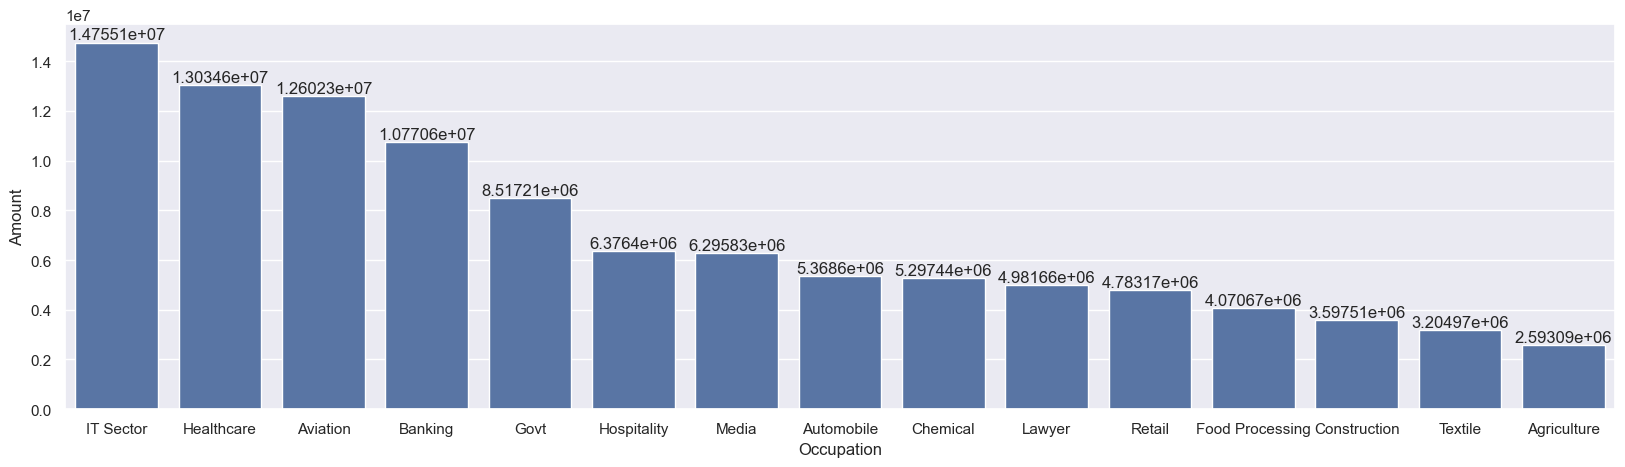

In [69]:
# Purchasing power distribution by occupation
sales_state=df.groupby(['Occupation'],as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sns.set(rc={'figure.figsize':(20,5)})
ax=sns.barplot(x='Occupation',y='Amount',data=sales_state)
for bar in ax.containers:
    ax.bar_label(bar)

In [70]:
# from the above we can see that most of the buyers are from IT sector, Healthcare, Aviation

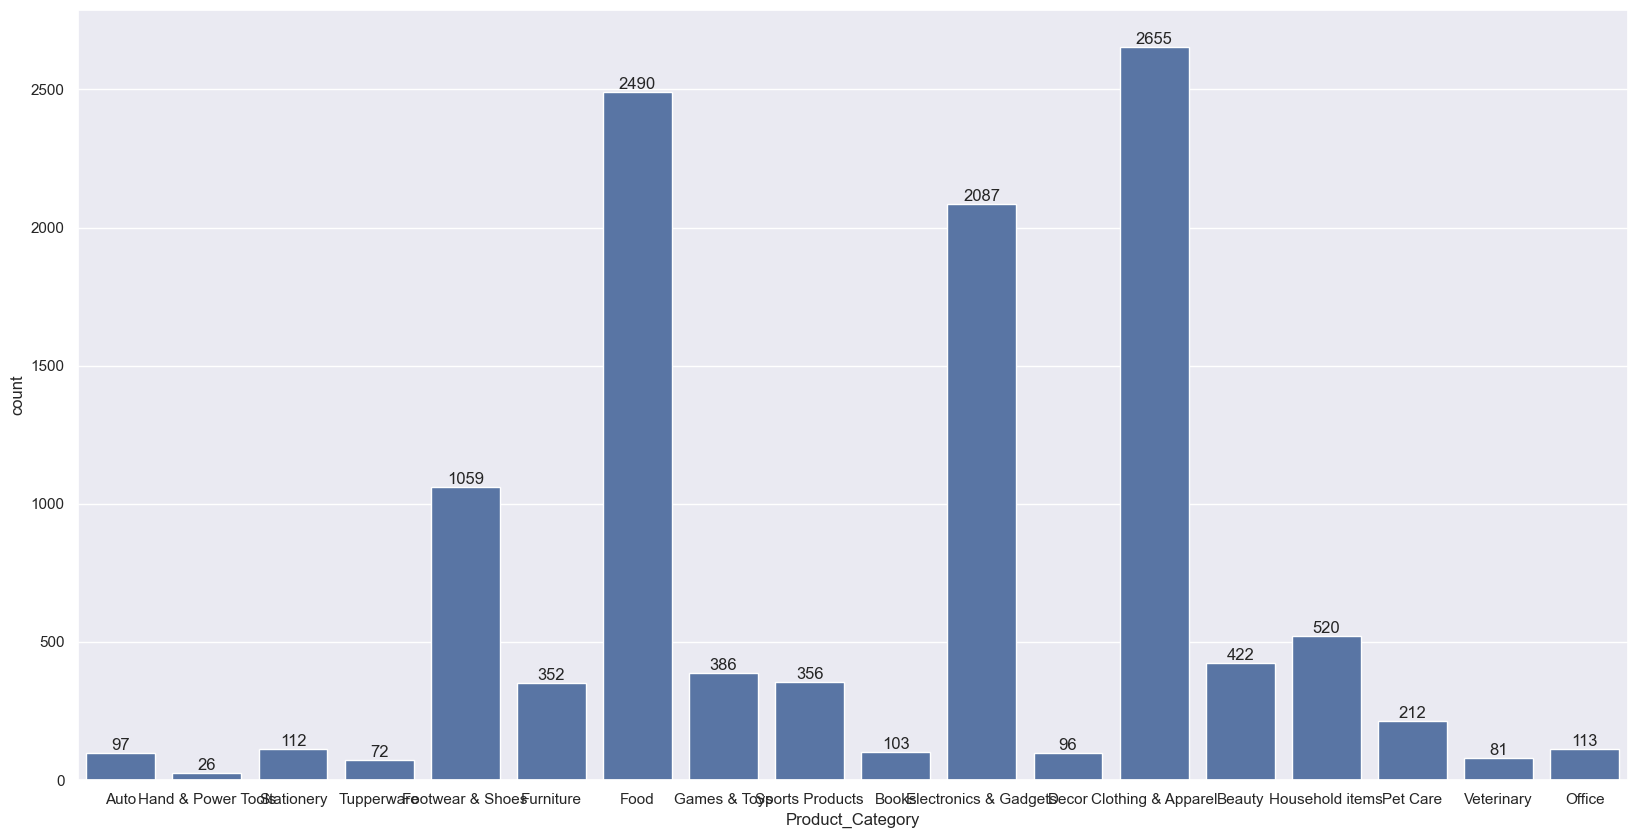

In [73]:
# distribution of Diwali sales by product category
ax=sns.countplot(x='Product_Category',data=df)
sns.set(rc={'figure.figsize':(20,10)})
for bar in ax.containers:
    ax.bar_label(bar)

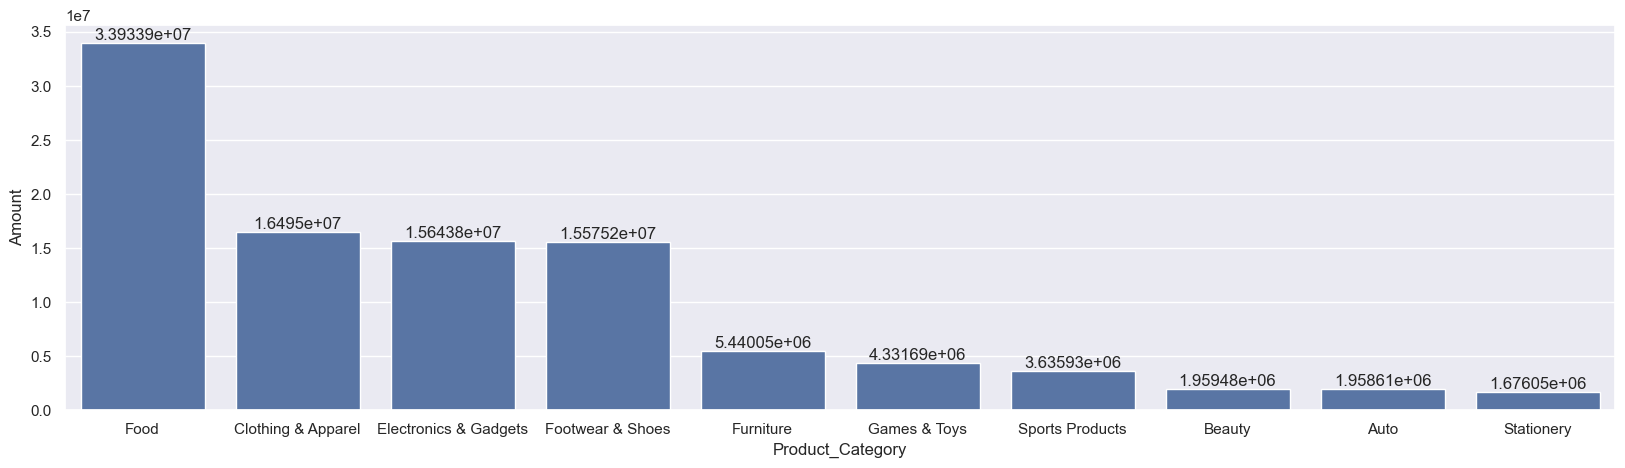

In [76]:
# Purchasing power distribution by product_category
sales_state=df.groupby(['Product_Category'],as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)
sns.set(rc={'figure.figsize':(20,5)})
ax=sns.barplot(x='Product_Category',y='Amount',data=sales_state)
for bar in ax.containers:
    ax.bar_label(bar)

In [77]:
# from the above we can see that most of the purchases are coming from Food, Clothing and Electronics

In [ ]:
# conclusion 
# Married women within age group 26-35 from UP, Maharashtra and Karnataka working in IT, Healthcare and Aviation are more likely to buy products from
# Food, clothing and electronics